<a href="https://colab.research.google.com/github/Wanita-8943/My_Main_Project_Lt-/blob/main/5.6_(4e-4)AR6_Predict_Unfreeze_250_Lt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##เรียกใช้ CSV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 1085, done.
remote: Counting objects: 100% (248/248), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 1085 (delta 124), reused 241 (delta 121), pack-reused 837
Receiving objects: 100% (1085/1085), 14.09 MiB | 27.54 MiB/s, done.
Resolving deltas: 100% (621/621), done.
/content/efficientnet_keras_transfer_learning


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/All_File_Lt/Model/Regression/5/5.6_(4e-4)AR6_Unfreeze_250_Lt.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/All_File_Lt/Model/Regression/5/5.6_(4e-4)AR6_Unfreeze_250_Lt.h5')
height = width = model.input_shape[1]

In [ ]:
df = pd.read_csv (r'/content/drive/MyDrive/All_File_Lt/Data/All_Data_Lt.csv')
df

,Fig_Age,Fig_Person,Class_Age+Gender,Class_Age,Class_0-18,Age(year),Class_0-1,Filename,Path_filename,Sex,Floder
0,1,1,Y07F,Y07,0,7,0,V1.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Both
1,2,1,Y07F,Y07,0,7,0,Flip_V1.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Both
2,3,2,Y07F,Y07,0,7,0,V2.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Both
3,4,2,Y07F,Y07,0,7,0,Flip_V2.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Both
4,5,3,Y07F,Y07,0,7,0,V3.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Both
...,...,...,...,...,...,...,...,...,...,...,...
4745,121,77,Y25M,Y25,18,25,1,Flip_J463.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Male,Both
4746,122,78,Y25M,Y25,18,25,1,J464.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Male,Both
4747,123,78,Y25M,Y25,18,25,1,Flip_J464.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Male,Both
4748,124,79,Y25M,Y25,18,25,1,J465.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Male,Both


In [ ]:
train = df[df['Fig_Age'].between(1,75)]
test = df[df['Fig_Age'].between(101,125)]

In [ ]:
DATA_PATH = "/content/drive/My Drive/All_File_Lt/TVT_All_Lt"
os.chdir(DATA_PATH)
train_dir = os.path.join(DATA_PATH, 'train')
print(train_dir)
test_dir = os.path.join(DATA_PATH, 'test')
print(test_dir)

/content/drive/My Drive/All_File_Lt/TVT_All_Lt/train
/content/drive/My Drive/All_File_Lt/TVT_All_Lt/test


In [ ]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train,
        directory = train_dir,
        x_col = 'Path_filename',
        y_col = 'Age(year)',
        # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        target_size=(height, width),
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, we need categorical labels
        #เนื่องจากเราใช้ categorical_crossentropy loss เราจึงต้องมีป้ายกำกับตามหมวดหมู่
        class_mode = 'other')

#label
# labels = (train_generator.class_indices)
# labels = dict((v,k) for k,v in labels.items())
# print(labels)

Found 2850 validated image filenames.


In [ ]:
test = df[df['Fig_Age'].between(101,125)]
test

,Fig_Age,Fig_Person,Class_Age+Gender,Class_Age,Class_0-18,Age(year),Class_0-1,Filename,Path_filename,Sex,Floder
100,101,52,Y07F,Y07,0,7,0,V67.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Both
101,102,52,Y07F,Y07,0,7,0,Flip_V67.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Both
102,103,53,Y07F,Y07,0,7,0,V68.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Both
103,104,53,Y07F,Y07,0,7,0,Flip_V68.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Both
104,105,54,Y07F,Y07,0,7,0,V69.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Both
...,...,...,...,...,...,...,...,...,...,...,...
4745,121,77,Y25M,Y25,18,25,1,Flip_J463.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Male,Both
4746,122,78,Y25M,Y25,18,25,1,J464.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Male,Both
4747,123,78,Y25M,Y25,18,25,1,Flip_J464.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Male,Both
4748,124,79,Y25M,Y25,18,25,1,J465.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Male,Both


In [ ]:
act = test['Age(year)'].tolist() #ค่าจริง
path = test['Path_filename'].tolist() #path

In [ ]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตามพารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)  #model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [ ]:
predict_image(path[0])[0]

1/1 [==============================] - 2s 2s/step


7.991488

In [ ]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = predict[0]
    pred_list.append(result)
    # prob_list.append(predict[result])

1/1 [==============================] - 0s 41ms/step


In [ ]:
pred_list

[7.991488,
 7.773159,
 6.8966265,
 7.3238564,
 7.341475,
 7.1563187,
 7.652875,
 7.2711735,
 7.01093,
 7.8510394,
 7.1313796,
 7.1204796,
 10.843572,
 10.843572,
 6.8724,
 6.985427,
 6.8660884,
 6.888214,
 7.9375477,
 7.9428873,
 7.709476,
 7.870985,
 7.735119,
 10.353356,
 7.3010225,
 9.415176,
 9.627376,
 7.9981437,
 7.9888105,
 10.843572,
 10.843572,
 8.429428,
 8.301105,
 9.281462,
 8.4617605,
 8.387208,
 8.595405,
 9.248101,
 9.355064,
 8.262557,
 8.215121,
 8.873956,
 8.826234,
 8.607317,
 8.620152,
 8.410024,
 8.070524,
 7.576451,
 7.9761696,
 8.904437,
 13.153606,
 11.391711,
 8.95833,
 9.223227,
 10.146411,
 10.472465,
 9.65168,
 8.791584,
 9.347801,
 9.414806,
 8.481235,
 8.786481,
 8.681938,
 8.387591,
 8.035566,
 9.353252,
 9.164602,
 8.716533,
 8.923388,
 9.326361,
 9.182365,
 8.883215,
 8.892477,
 9.441553,
 9.128182,
 10.303708,
 9.735488,
 10.145008,
 11.174778,
 10.991448,
 8.595755,
 8.737674,
 9.65398,
 9.333749,
 11.056809,
 11.103506,
 8.458629,
 8.352759,
 8.50085

In [ ]:
print(type(pred_list))

<class 'list'>


In [ ]:
pred_int = np.around(pred_list)

In [ ]:
pred = np.array(pred_int) #แปลงเป็น array
act = np.array(act)

In [ ]:
pred

array([ 8.,  8.,  7.,  7.,  7.,  7.,  8.,  7.,  7.,  8.,  7.,  7., 11.,
       11.,  7.,  7.,  7.,  7.,  8.,  8.,  8.,  8.,  8., 10.,  7.,  9.,
       10.,  8.,  8., 11., 11.,  8.,  8.,  9.,  8.,  8.,  9.,  9.,  9.,
        8.,  8.,  9.,  9.,  9.,  9.,  8.,  8.,  8.,  8.,  9., 13., 11.,
        9.,  9., 10., 10., 10.,  9.,  9.,  9.,  8.,  9.,  9.,  8.,  8.,
        9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9., 10., 10., 10.,
       11., 11.,  9.,  9., 10.,  9., 11., 11.,  8.,  8.,  9.,  9., 10.,
       10.,  8.,  9., 10., 10.,  8.,  9.,  9.,  9., 10., 10., 11., 11.,
       11.,  9., 11., 10., 10., 11., 12., 11., 11., 11., 11., 11., 11.,
       12., 12., 11., 11., 11., 11., 11., 11., 12., 12., 11., 11., 11.,
       11., 11., 12., 11., 11., 11., 11., 13., 13., 11., 12., 12., 12.,
       11., 11., 12., 12., 11., 11., 12., 13., 13., 13., 13., 13., 13.,
       15., 12., 13., 13., 12., 11., 13., 13., 12., 12., 13., 13., 13.,
       12., 12., 14., 14., 13., 13., 14., 14., 14., 14., 15., 13

#confusion_matrix

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 26.105263157894736%
              precision    recall  f1-score   support

           7       1.00      0.58      0.73        50
           8       0.47      0.48      0.48        50
           9       0.37      0.56      0.45        50
          10       0.37      0.34      0.35        50
          11       0.33      0.68      0.45        50
          12       0.34      0.44      0.39        50
          13       0.32      0.50      0.39        50
          14       0.22      0.32      0.26        50
          15       0.08      0.10      0.09        50
          16       0.07      0.08      0.08        50
          17       0.14      0.18      0.16        50
          18       0.11      0.12      0.12        50
          19       0.11      0.10      0.10        50
          20       0.08      0.10      0.09        50
          21       0.20      0.18      0.19        50
          22       0.27      0.16      0.20        50
          23       0.09      0.02      

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 76.24999999999999, 'Predicted label')

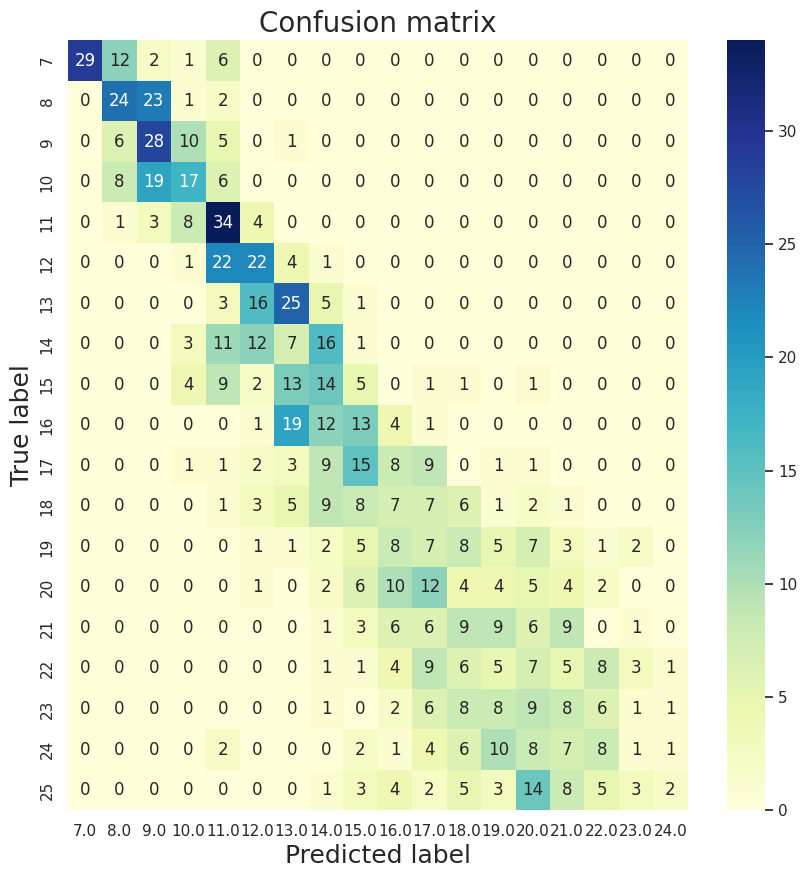

In [ ]:
#create CF 
data = {'Actual': act,'Predicted' : pred}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

#MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(act,pred)
mse = mean_squared_error(act,pred)
rmse = mean_squared_error(act,pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 2.0873684210526315
MSE: 8.75263157894737
RMSE: 2.9584846761386765
